
**Lifecycle of a Data Science Projects**

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys

Feature Engineering---Handling Missing Values

**Why are their Missing values?**

Survey--Depression Survey

They hesitate to put down the information

Survey informations are not that valid

Men--salary

Women---age

People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

**What are the different types of Missing Data?**

Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

**Missing Data Not At Random(MNAR):**

Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [ ]:
url='https://raw.githubusercontent.com/Nikhil14384/Feature_Engineering/main/Handling%20missing%20values/titanic.csv'


In [ ]:
import pandas as pd
df=pd.read_csv(url)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [ ]:
df.Cabin_null.head()

0    1
1    0
2    1
3    0
4    1
Name: Cabin_null, dtype: int64

In [ ]:
len(df.Cabin_null)

891

In [ ]:
df.Cabin_null.value_counts()

1    687
0    204
Name: Cabin_null, dtype: int64

## **Mean/Median/Mode Imputation**

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [ ]:
df=pd.read_csv(url,usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df,variable,mmm,value):
  if mmm=="Median":
    df[variable+"_"+mmm]=df[variable].fillna(value)
    print(f'Null values have been replaced succesfully with {mmm}')
  elif mmm=="Mean":
    df[variable+"_"+mmm]=df[variable].fillna(value)
    print(f'Null values have been replaced succesfully with {mmm}')
  elif mmm=="Mode":
    df[variable+"_"+mmm]=df[variable].fillna(value)
    print(f'Null values have been replaced succesfully with {mmm}')
  else:
    print('pls provide the correct replace function')


In [ ]:
median_v=df.Age.median()
median_v

28.0

In [ ]:
impute_nan(df,'Age','Median',median_v)

Null values have been replaced succesfully with Median


In [ ]:
df.head(10)

,Survived,Age,Fare,Age_Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [ ]:
print(df.Age.std())
print(df.Age_Median.std())

14.526497332334044
13.019696550973194


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

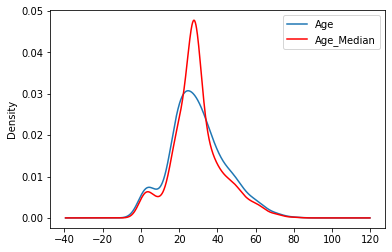

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_Median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**When/Where&What to use?**

Mean/Median --- continuous and discrete numerical variables only.

Mode --- categorical variables



**Advantages And Disadvantages of Mean/Median Imputation**

**Advantages**

Easy to implement(Robust to outliers)

Faster way to obtain the complete 
dataset 

**Disadvantages**

Change or Distortion in the original variance

Impacts Correlation